In [1]:
#Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing Sales and Inventory Data

In [2]:
sales_data=pd.read_csv("sales_data_recent_modified.csv",sep=",",encoding="ISO-8859-1")
inventory_data=pd.read_csv("inventory_data.csv",sep=",",encoding="ISO-8859-1")
# importing rounds data file
sales_data

,Order ID,Date,SKU,Units Sold,Selling Price,Total Sales Value
0,1,2024-09-22 10:37:46.230237,SKU0033,2,99.26,198.52
1,2,2024-10-20 10:37:46.230237,SKU0039,2,98.17,196.34
2,3,2024-10-14 10:37:46.230237,SKU0043,1,23.41,23.41
3,4,2024-11-13 10:37:46.230237,SKU0025,2,69.17,138.34
4,5,2024-09-29 10:37:46.230237,SKU0018,2,45.97,91.94
...,...,...,...,...,...,...
9995,9996,2024-10-08 10:37:46.230237,SKU0024,1,18.65,18.65
9996,9997,2024-11-06 10:37:46.230237,SKU0098,2,50.79,101.58
9997,9998,2024-11-03 10:37:46.230237,SKU0041,2,20.67,41.34
9998,9999,2024-10-08 10:37:46.230237,SKU0054,1,33.29,33.29


Understanding the Given Data Set

In [3]:
# Inspect sales data
print(sales_data.info())
print(sales_data.describe())
print(sales_data.isnull().sum())
print(sales_data.duplicated().sum())

# Cleaning sales data
# Drop duplicates
sales_data = sales_data.drop_duplicates()

# Handle missing values
sales_data['Selling Price'] = sales_data['Selling Price'].fillna(sales_data['Selling Price'].mean())
sales_data['Units Sold'] = sales_data['Units Sold'].fillna(0)

# Ensure data types
sales_data['Units Sold'] = sales_data['Units Sold'].astype(int)

# Validate values (e.g., positive values for Units Sold and Selling Price)
sales_data = sales_data[(sales_data['Units Sold'] > 0) & (sales_data['Selling Price'] > 0)]

# Inspect inventory data
print(inventory_data.info())
print(inventory_data.describe())
print(inventory_data.isnull().sum())
print(inventory_data.duplicated().sum())

# Cleaning inventory data
# Drop duplicates
inventory_data = inventory_data.drop_duplicates()

# Handle missing values
inventory_data['Stock Level'] = inventory_data['Stock Level'].fillna(0)
inventory_data['Reorder Level'] = inventory_data['Reorder Level'].fillna(inventory_data['Reorder Level'].mean())
inventory_data['Cost Price'] = inventory_data['Cost Price'].fillna(inventory_data['Cost Price'].mean())

# Ensure proper data types
inventory_data['SKU'] = inventory_data['SKU'].astype(str)
inventory_data['Stock Level'] = inventory_data['Stock Level'].astype(int)

# Validate stock levels and reorder levels
inventory_data = inventory_data[inventory_data['Stock Level'] >= 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           10000 non-null  int64  
 1   Date               10000 non-null  object 
 2   SKU                10000 non-null  object 
 3   Units Sold         10000 non-null  int64  
 4   Selling Price      10000 non-null  float64
 5   Total Sales Value  10000 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 468.9+ KB
None
          Order ID    Units Sold  Selling Price  Total Sales Value
count  10000.00000  10000.000000   10000.000000       10000.000000
mean    5000.50000      1.492500      55.299102          82.516850
std     2886.89568      0.499969      26.104378          49.584085
min        1.00000      1.000000      10.000000          10.000000
25%     2500.75000      1.000000      32.927500          43.320000
50%     5000.50000      1.000000      

Data Cleanup

In [4]:
#Removing the constant time string from Date Column
sales_data["Date"] = sales_data["Date"].str.replace(r'10:37:46.230237', '')
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

In [5]:
#Removing repetitive String "SKU" From SKU Column to converting the identity into numeric form
sales_data["SKU"] = sales_data["SKU"].str.replace(r'SKU', '')
sales_data["SKU"] = pd.to_numeric(sales_data["SKU"])
sales_data

,Order ID,Date,SKU,Units Sold,Selling Price,Total Sales Value
0,1,2024-09-22,33,2,99.26,198.52
1,2,2024-10-20,39,2,98.17,196.34
2,3,2024-10-14,43,1,23.41,23.41
3,4,2024-11-13,25,2,69.17,138.34
4,5,2024-09-29,18,2,45.97,91.94
...,...,...,...,...,...,...
9995,9996,2024-10-08,24,1,18.65,18.65
9996,9997,2024-11-06,98,2,50.79,101.58
9997,9998,2024-11-03,41,2,20.67,41.34
9998,9999,2024-10-08,54,1,33.29,33.29


In [6]:
# Save cleaned datasets
sales_data.to_csv('cleaned_sales_data.csv', index=False)
inventory_data.to_csv('cleaned_inventory_data.csv', index=False)
print("Data cleaning completed!")

Data cleaning completed!


#### Computing Daily Run Rate

In [7]:
#Finding total unit sold grouping by Date and SKU
dailygroup=sales_data.groupby(['Date','SKU']).agg({
    'Units Sold':'sum',
}).reset_index()
dailygroup

,Date,SKU,Units Sold
0,2024-09-17,1,3
1,2024-09-17,2,2
2,2024-09-17,3,2
3,2024-09-17,4,1
4,2024-09-17,5,5
...,...,...,...
4922,2024-11-16,95,4
4923,2024-11-16,96,2
4924,2024-11-16,98,3
4925,2024-11-16,99,6


In [8]:
#Finding total unit sold daily for each SKU
total_unit_sold_daily=dailygroup.groupby(['SKU']).agg({
    'Units Sold':'sum'
}).reset_index()
# Calculating the Daily Run Rate 
total_unit_sold_daily["Daily_Run_Rate"]=total_unit_sold_daily['Units Sold']/61
total_unit_sold_daily

,SKU,Units Sold,Daily_Run_Rate
0,1,147,2.409836
1,2,169,2.770492
2,3,146,2.393443
3,4,158,2.590164
4,5,180,2.950820
...,...,...,...
95,96,138,2.262295
96,97,133,2.180328
97,98,157,2.573770
98,99,130,2.131148


Visualyzing Top 10 SKU's with highest DRR

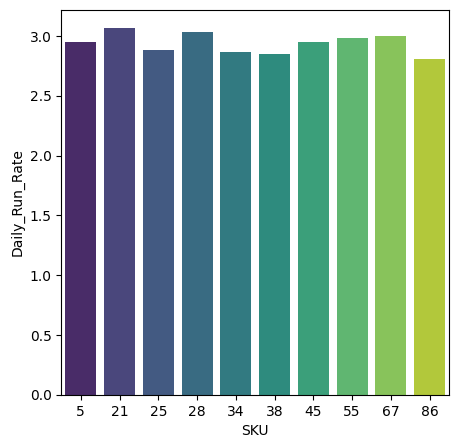

In [9]:
#Visualisation of SKU vs Daily Run Rate of top 10 SKU
top_skus = total_unit_sold_daily.sort_values(by='Daily_Run_Rate', ascending=False).head(10)
plt.figure(figsize=(5, 5))
sns.barplot(data=top_skus, x='SKU', y='Daily_Run_Rate', palette='viridis')
plt.show()

#### Computing Days On Hand

In [10]:
#Converting the SKU column into Numeric type in Inventory Dataset 
inventory_data["SKU"] = inventory_data["SKU"].str.replace(r'SKU', '')
inventory_data["SKU"] = pd.to_numeric(inventory_data["SKU"])

In [11]:
#This is for calculating Days on Hand for SKU for each given 
Combined_Inventory_Data_DOH_DRR=pd.merge(inventory_data,total_unit_sold_daily,on="SKU",how='left') #left table join
Combined_Inventory_Data_DOH_DRR["DOH"]=Combined_Inventory_Data_DOH_DRR["Stock Level"]/Combined_Inventory_Data_DOH_DRR["Daily_Run_Rate"]
del Combined_Inventory_Data_DOH_DRR["Units Sold"]
Combined_Inventory_Data_DOH_DRR

,Date,SKU,Stock Level,Reorder Level,Cost Price,Daily_Run_Rate,DOH
0,2024-01-01,1,228,119,33.55,2.409836,94.612245
1,2024-01-02,1,374,110,13.29,2.409836,155.197279
2,2024-01-03,1,426,54,17.82,2.409836,176.775510
3,2024-01-04,1,267,108,46.22,2.409836,110.795918
4,2024-01-05,1,111,51,13.25,2.409836,46.061224
...,...,...,...,...,...,...,...
2995,2024-01-26,100,217,86,18.14,2.622951,82.731250
2996,2024-01-27,100,159,57,40.89,2.622951,60.618750
2997,2024-01-28,100,325,54,12.71,2.622951,123.906250
2998,2024-01-29,100,243,72,32.38,2.622951,92.643750


Visualyzing DOH w.r.t Stock Level & Reorder Level

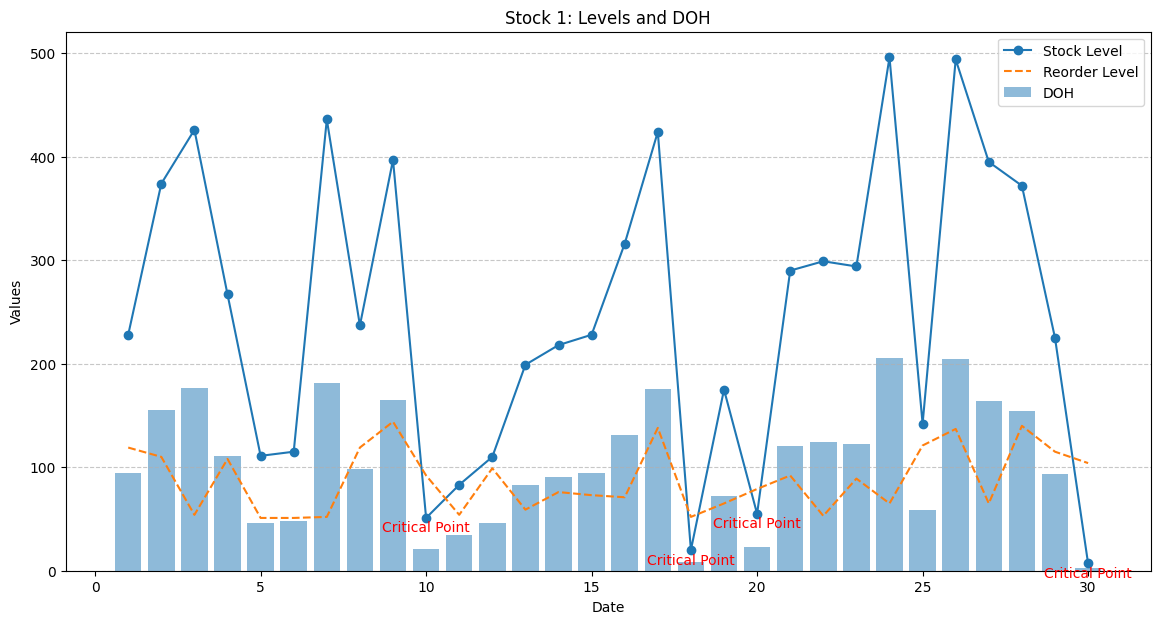

'stock_ids = Combined_Inventory_Data_DOH_DRR["SKU"].unique()\nplt.figure(figsize=(12, 8))\nfor stock_id in stock_ids:\n    stock_data = Combined_Inventory_Data_DOH_DRR[Combined_Inventory_Data_DOH_DRR["SKU"] == stock_id]\n    plt.figure(figsize=(10, 5))\n    plt.plot(stock_data["Date"], stock_data["Stock Level"], label="Stock Level", marker="o")\n    plt.plot(stock_data["Date"], stock_data["Reorder Level"], label="Reorder Level", linestyle="--")\n    plt.bar(stock_data["Date"], stock_data["DOH"], alpha=0.5, label="DOH")\n    plt.title(f"Stock {stock_id}: Levels and DOH")\n    plt.xlabel("Date")\n    plt.ylabel("Values")\n    plt.legend()\n    plt.grid(axis="y", linestyle="--", alpha=0.7)\n    plt.show()'

In [12]:
#Sample Plot of SKU Unit 1 with DOH, Stock Level & Reorder Level
stock_data = Combined_Inventory_Data_DOH_DRR[Combined_Inventory_Data_DOH_DRR["SKU"] == 1]
stock_data["Date"]=(pd.to_datetime(stock_data["Date"])).dt.day
plt.figure(figsize=(14, 7))
for idx, row in stock_data.iterrows():
    if row["Stock Level"] < row["Reorder Level"]:
        plt.annotate("Critical Point", (row["Date"], row["Stock Level"]), textcoords="offset points", xytext=(0, -10), ha='center', color="red")
plt.plot(stock_data["Date"], stock_data["Stock Level"], label="Stock Level", marker="o")
plt.plot(stock_data["Date"], stock_data["Reorder Level"], label="Reorder Level", linestyle="--")
plt.bar(stock_data["Date"], stock_data["DOH"], alpha=0.5, label="DOH")
plt.title(f"Stock {1}: Levels and DOH")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plot for each SKU with DOH, Stock Level & Reorder Level : Uncomment for In Detail Analysis for Each SKU
'''stock_ids = Combined_Inventory_Data_DOH_DRR["SKU"].unique()
plt.figure(figsize=(12, 8))
for stock_id in stock_ids:
    stock_data = Combined_Inventory_Data_DOH_DRR[Combined_Inventory_Data_DOH_DRR["SKU"] == stock_id]
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data["Date"], stock_data["Stock Level"], label="Stock Level", marker="o")
    plt.plot(stock_data["Date"], stock_data["Reorder Level"], label="Reorder Level", linestyle="--")
    plt.bar(stock_data["Date"], stock_data["DOH"], alpha=0.5, label="DOH")
    plt.title(f"Stock {stock_id}: Levels and DOH")
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()'''

#### SKU Performance Analysis & Categorization 

In [13]:
#SKU PERFORMANCE ANALYSIS
low_threshold = total_unit_sold_daily["Units Sold"].quantile(0.25)  # Bottom 25%
high_threshold = total_unit_sold_daily["Units Sold"].quantile(0.75)  # Top 25%
print(low_threshold)
print(high_threshold)

# Categorize based on ranges
def categorize(value):
    if value <= low_threshold:
        return "Low Seller"
    elif value >= high_threshold:
        return "Best Seller"
    else:
        return "Medium Seller"

total_unit_sold_daily["Category"] = total_unit_sold_daily["Units Sold"].apply(categorize)
total_unit_sold_daily

139.0
158.25


,SKU,Units Sold,Daily_Run_Rate,Category
0,1,147,2.409836,Medium Seller
1,2,169,2.770492,Best Seller
2,3,146,2.393443,Medium Seller
3,4,158,2.590164,Medium Seller
4,5,180,2.950820,Best Seller
...,...,...,...,...
95,96,138,2.262295,Low Seller
96,97,133,2.180328,Low Seller
97,98,157,2.573770,Medium Seller
98,99,130,2.131148,Low Seller


Visualizing Categorised Data

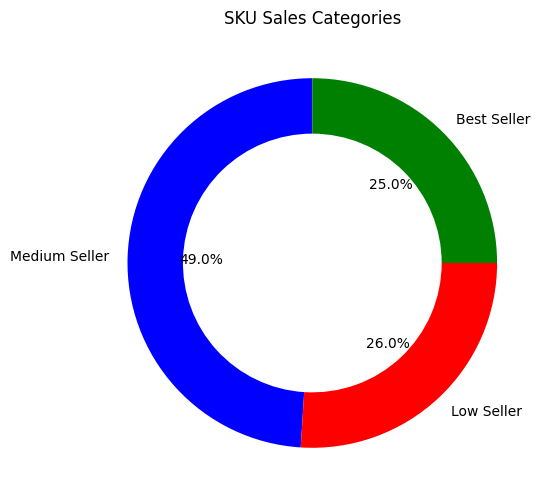

In [14]:
#Visualisation categorize based on ranges
category_counts = total_unit_sold_daily["Category"].value_counts()

color_map = {"Best Seller": "green", "Low Seller": "red", "Medium Seller": "blue"}
colors = [color_map[category] for category in category_counts.index]

plt.figure(figsize=(6, 6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.3}  # This creates the "donut" effect
)
plt.title("SKU Sales Categories")
plt.show()

#### Analyzing Reorder Quantity Suggestion

In [15]:
Combined_Inventory_Data_DOH_DRR["ReorderNeeded"]=Combined_Inventory_Data_DOH_DRR["Stock Level"]<Combined_Inventory_Data_DOH_DRR["Reorder Level"]
Combined_Inventory_Data_DOH_DRR["ReorderQuantity"]=Combined_Inventory_Data_DOH_DRR["Reorder Level"]-Combined_Inventory_Data_DOH_DRR["Stock Level"]
Combined_Inventory_Data_DOH_DRR.loc[Combined_Inventory_Data_DOH_DRR["ReorderQuantity"]<0,"ReorderQuantity"]=0
Combined_Inventory_Data_DOH_DRR

,Date,SKU,Stock Level,Reorder Level,Cost Price,Daily_Run_Rate,DOH,ReorderNeeded,ReorderQuantity
0,2024-01-01,1,228,119,33.55,2.409836,94.612245,False,0
1,2024-01-02,1,374,110,13.29,2.409836,155.197279,False,0
2,2024-01-03,1,426,54,17.82,2.409836,176.775510,False,0
3,2024-01-04,1,267,108,46.22,2.409836,110.795918,False,0
4,2024-01-05,1,111,51,13.25,2.409836,46.061224,False,0
...,...,...,...,...,...,...,...,...,...
2995,2024-01-26,100,217,86,18.14,2.622951,82.731250,False,0
2996,2024-01-27,100,159,57,40.89,2.622951,60.618750,False,0
2997,2024-01-28,100,325,54,12.71,2.622951,123.906250,False,0
2998,2024-01-29,100,243,72,32.38,2.622951,92.643750,False,0


In [16]:
#Reorder Quantity for total month of Each SKU
Reorder_Quantity_Suggestion=Combined_Inventory_Data_DOH_DRR.groupby(['Date','SKU']).agg({
    'ReorderQuantity':'sum',
}).reset_index()
Reorder_Quantity_Suggestion=Combined_Inventory_Data_DOH_DRR.groupby(['SKU']).agg({
    'ReorderQuantity':'sum',
}).reset_index()
Reorder_Quantity_Suggestion

,SKU,ReorderQuantity
0,1,194
1,2,491
2,3,282
3,4,456
4,5,448
...,...,...
95,96,89
96,97,510
97,98,625
98,99,316


In [17]:
#Calculating mean Selling price and total units sold for each SKU
average_sales_data=sales_data.groupby(['Date','SKU']).agg({
    'Selling Price':'mean',
    'Units Sold':'sum',
}).reset_index()
average_sales_data

,Date,SKU,Selling Price,Units Sold
0,2024-09-17,1,79.645000,3
1,2024-09-17,2,71.020000,2
2,2024-09-17,3,43.730000,2
3,2024-09-17,4,51.980000,1
4,2024-09-17,5,68.953333,5
...,...,...,...,...
4922,2024-11-16,95,84.135000,4
4923,2024-11-16,96,87.990000,2
4924,2024-11-16,98,19.473333,3
4925,2024-11-16,99,56.186667,6


In [18]:
average_sales_data=average_sales_data.groupby(['SKU']).agg({
    'Selling Price':'mean',
     'Units Sold':'sum',
}).reset_index()
average_sales_data

,SKU,Selling Price,Units Sold
0,1,62.180861,147
1,2,53.363846,169
2,3,55.270967,146
3,4,50.728942,158
4,5,56.870173,180
...,...,...,...
95,96,56.806826,138
96,97,55.657413,133
97,98,54.185319,157
98,99,56.210960,130


Visualyzing Selling Price with the Units Sold

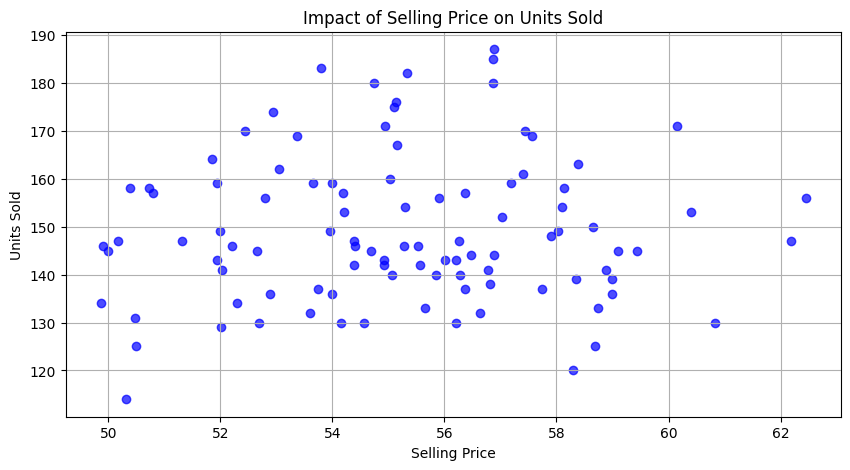

In [20]:
# Visualisation of Impact of Selling Price on Units Sold
plt.figure(figsize=(10, 5))
plt.scatter(average_sales_data["Selling Price"], average_sales_data["Units Sold"], color="blue", alpha=0.7)
plt.title("Impact of Selling Price on Units Sold")
plt.xlabel("Selling Price")
plt.ylabel("Units Sold")
plt.grid()
plt.show()

#### Computing Price Sensitivity

In [21]:
average_sales_data["Price_Change"] = average_sales_data["Selling Price"].pct_change()  # % change in price
average_sales_data["Quantity_Change"] = average_sales_data["Units Sold"].pct_change()  # % change in units sold
average_sales_data["PED"] = average_sales_data["Quantity_Change"] / average_sales_data["Price_Change"]
average_sales_data

,SKU,Selling Price,Units Sold,Price_Change,Quantity_Change,PED
0,1,62.180861,147,NaN,NaN,NaN
1,2,53.363846,169,-0.141796,0.149660,-1.055457
2,3,55.270967,146,0.035738,-0.136095,-3.808115
3,4,50.728942,158,-0.082177,0.082192,-1.000175
4,5,56.870173,180,0.121060,0.139241,1.150180
...,...,...,...,...,...,...
95,96,56.806826,138,0.034475,-0.034965,-1.014221
96,97,55.657413,133,-0.020234,-0.036232,1.790670
97,98,54.185319,157,-0.026449,0.180451,-6.822555
98,99,56.210960,130,0.037384,-0.171975,-4.600269


In [22]:
#Sorting SKUs with High sensitivity
high_sensitivity = average_sales_data[average_sales_data['PED'] > 1]
print(high_sensitivity)

    SKU  Selling Price  Units Sold  Price_Change  Quantity_Change        PED
4     5      56.870173         180      0.121060         0.139241   1.150180
8     9      56.358867         157      0.077563         0.171642   2.212929
11   12      58.886543         141     -0.003551        -0.027586   7.768791
12   13      57.734194         137     -0.019569        -0.028369   1.449683
13   14      58.347759         139      0.010627         0.014599   1.373671
16   17      56.001465         143     -0.034765        -0.040268   1.158304
19   20      49.996429         145     -0.073861        -0.088050   1.192105
20   21      56.888983         187      0.137861         0.289655   2.101068
23   24      52.684426         130     -0.063576        -0.115646   1.819026
24   25      55.126733         176      0.046357         0.353846   7.633021
27   28      56.868148         185      0.094780         0.163522   1.725279
28   29      53.744612         137     -0.054926        -0.259459   4.723806

Getting top 3 most Sensitive SKU

In [23]:
# Sort by Price Elasticity to get the top 3 most sensitive SKUs
high_sensitivity.sort_values(by='PED', ascending=False, inplace=True)
top_3_skus = high_sensitivity.sort_values(by='PED', ascending=False).head(3)
print(top_3_skus)

    SKU  Selling Price  Units Sold  Price_Change  Quantity_Change        PED
93   94      57.442240         170      0.017134         0.180556  10.537929
49   50      53.996274         136     -0.020938        -0.185629   8.865785
79   80      54.935128         171      0.018200         0.147651   8.112739


In [24]:
# Function to simulate revenue change for a price adjustment
def simulate_price_adjustment(row, price_change_percentage):
    new_price = row['Selling Price'] * (1 + price_change_percentage / 100)
    new_units_sold = row['Units Sold'] * (1 + row['PED'] * price_change_percentage / 100)
    old_revenue = row['Selling Price'] * row['Units Sold']
    new_revenue = new_price * new_units_sold
    return new_price, new_units_sold, new_revenue, new_revenue - old_revenue

# Simulate price adjustments for top 3 SKUs
for index, row in top_3_skus.iterrows():
    price_change = -10  # Example: reduce price by 10%
    new_price, new_units_sold, new_revenue, revenue_change = simulate_price_adjustment(row, price_change)
    change_in_price=row['Selling Price']-new_price
    print(f"SKU: {row['SKU']}")
    print(f"  Old Avg Price: {row['Selling Price']}")
    print(f"  New Avg Price: {new_price}")
    print(f"  Suggested difference: {change_in_price}")

SKU: 94.0
  Old Avg Price: 57.44224
  New Avg Price: 51.698016
  Suggested difference: 5.7442239999999956
SKU: 50.0
  Old Avg Price: 53.99627407407407
  New Avg Price: 48.596646666666665
  Suggested difference: 5.399627407407408
SKU: 80.0
  Old Avg Price: 54.93512797619047
  New Avg Price: 49.441615178571425
  Suggested difference: 5.493512797619047


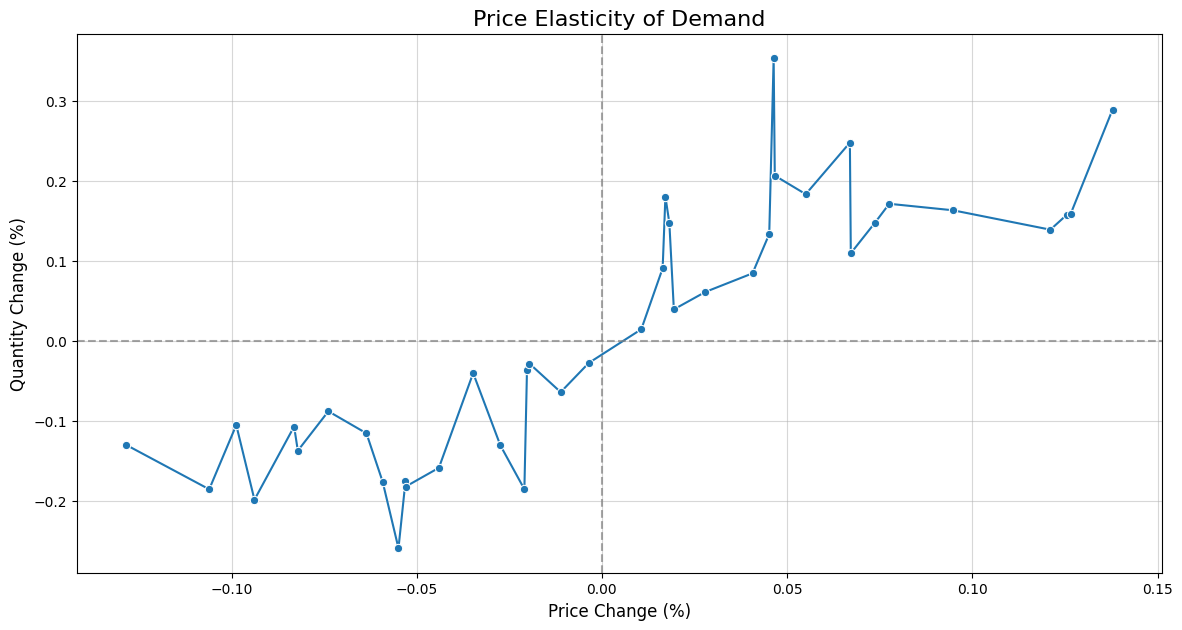

In [25]:
plt.figure(figsize=(14, 7))
sns.lineplot(x="Price_Change", y="Quantity_Change", data=high_sensitivity, marker="o")
plt.axhline(0, linestyle="--", color="gray", alpha=0.7)
plt.axvline(0, linestyle="--", color="gray", alpha=0.7)
plt.title("Price Elasticity of Demand", fontsize=16)
plt.xlabel("Price Change (%)", fontsize=12)
plt.ylabel("Quantity Change (%)", fontsize=12)
plt.grid(alpha=0.5)
plt.show()